In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [3]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])
print(orig_4_4)

[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


In [19]:
def subsample(x_in):
  x_out = np.zeros(( int(np.ceil(x_in.shape[0]/2)), int(np.ceil(x_in.shape[1]/2)) ))
  # TODO -- write the subsampling routine
  # Replace this line
  x_out = x_in[::2, ::2]


  return x_out

In [21]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Subsampled:
[[1 5]
 [4 1]]


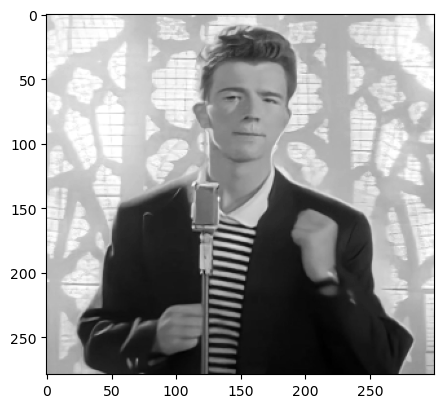

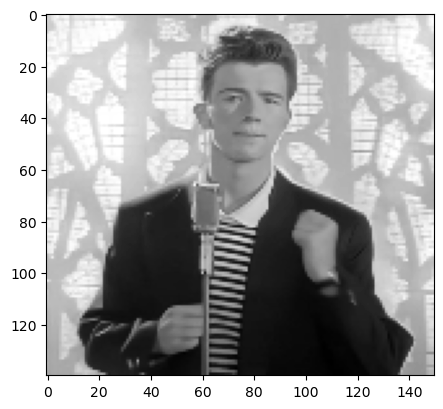

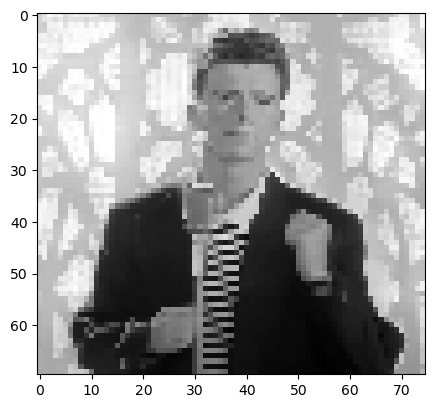

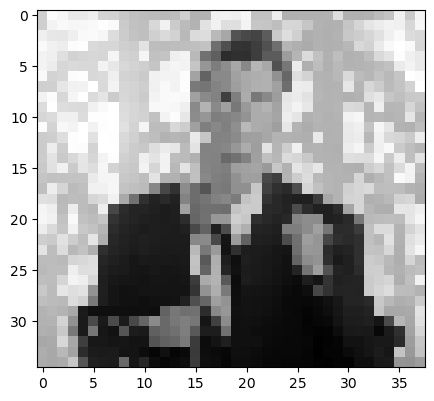

In [23]:
# load the image
image = Image.open('test_image.png')
# convert image to numpy array
data = asarray(image)
data_subsample = subsample(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

In [29]:
# Now let's try max-pooling
def maxpool(x_in):
  x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
  # TODO -- write the maxpool routine
  output_height = int(np.floor(x_in.shape[0] / 2))
  output_width = int(np.floor(x_in.shape[1] / 2))
  x_out = np.zeros((output_height, output_width))

  for i in range(output_height):
        for j in range(output_width):
            # Define the 2x2 block from the input image
            block = x_in[2*i:2*i+2, 2*j:2*j+2]
            
            # Find the maximum value in this block
            x_out[i, j] = np.max(block)

  return x_out

In [31]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Maxpooled:
[[6. 8.]
 [8. 4.]]


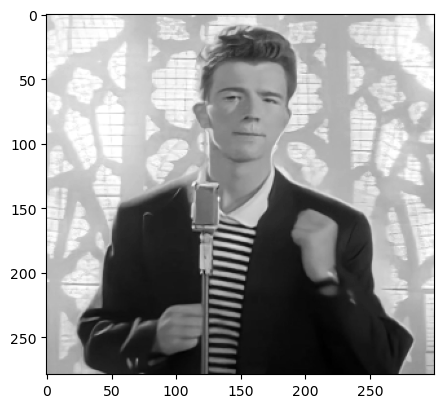

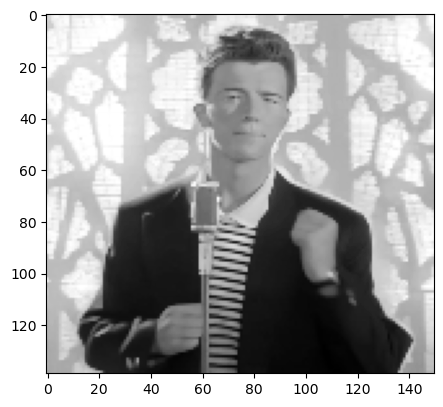

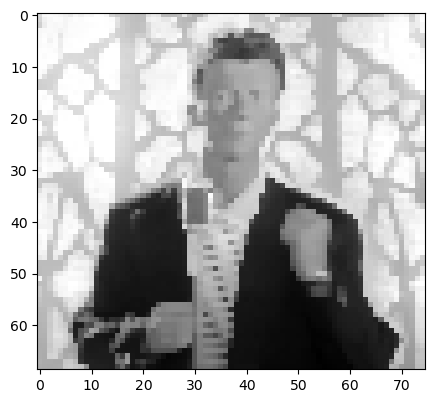

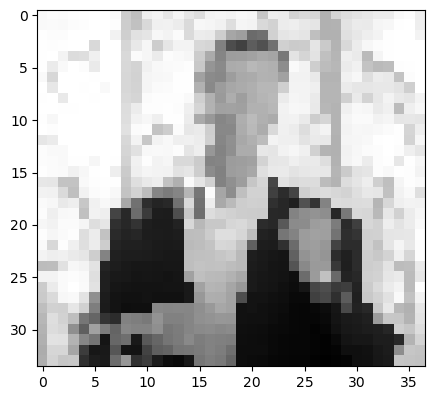

In [33]:
# Let's see what Rick looks like:
data_maxpool = maxpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

data_maxpool2 = maxpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

data_maxpool3 = maxpool(data_maxpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

In [37]:
# Finally, let's try mean pooling
def meanpool(x_in):
  x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
  # TODO -- write the meanpool routine
  output_height = int(np.floor(x_in.shape[0] / 2))  # Downsample height by 2
  output_width = int(np.floor(x_in.shape[1] / 2))   # Downsample width by 2

  # Initialize the output array
  x_out = np.zeros((output_height, output_width))

  # Iterate over each 2x2 block
  for i in range(output_height):
      for j in range(output_width):
          block = x_in[2*i:2*i+2, 2*j:2*j+2]
            
            # Calculate the mean value of this block
          x_out[i, j] = np.mean(block)


  return x_out

In [39]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Meanpooled:
[[3. 4.]
 [5. 2.]]


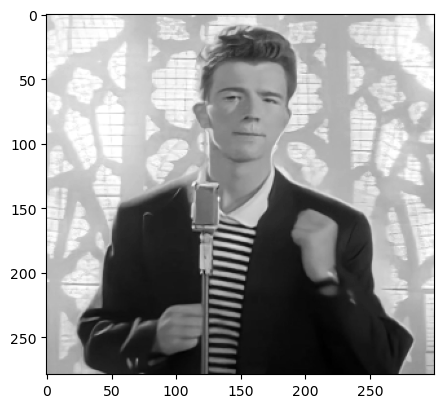

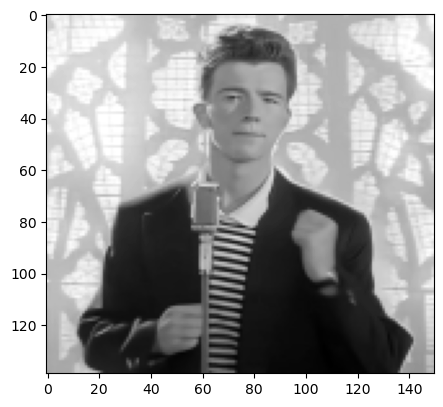

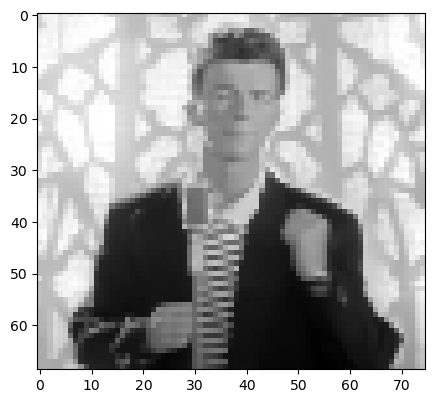

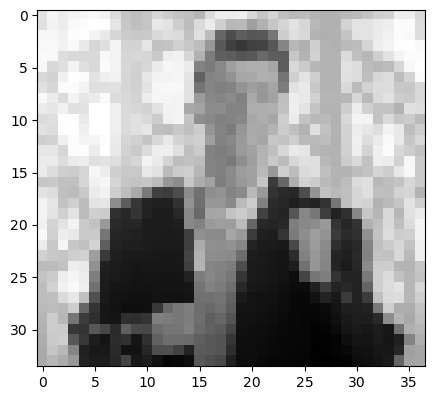

In [41]:
# Let's see what Rick looks like:
data_meanpool = meanpool(data);

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

In [43]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[6, 8], [8,4]])
print(orig_2_2)

[[6 8]
 [8 4]]


In [45]:
# Let's first use the duplication method
def duplicate(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TODO -- write the duplication routine
  
  for i in range(x_in.shape[0]):
        for j in range(x_in.shape[1]):
            # Assign the value to a 2x2 block in the output array
            x_out[2*i:2*i+2, 2*j:2*j+2] = x_in[i, j]

  return x_out

In [47]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2))

Original:
[[6 8]
 [8 4]]
Duplicated:
[[6. 6. 8. 8.]
 [6. 6. 8. 8.]
 [8. 8. 4. 4.]
 [8. 8. 4. 4.]]


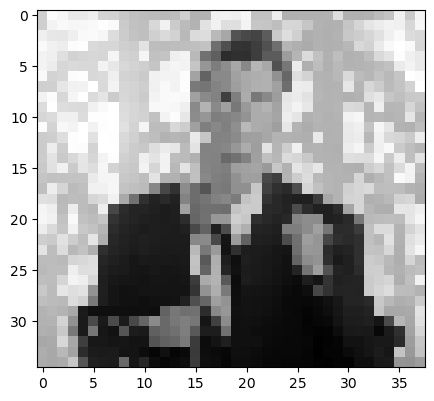

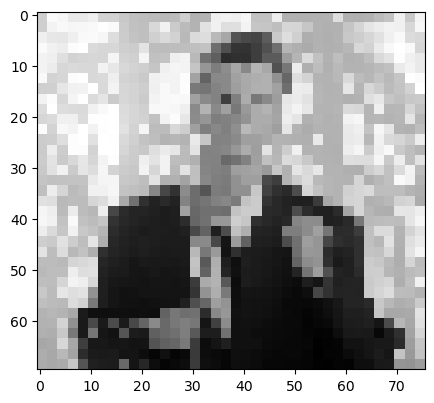

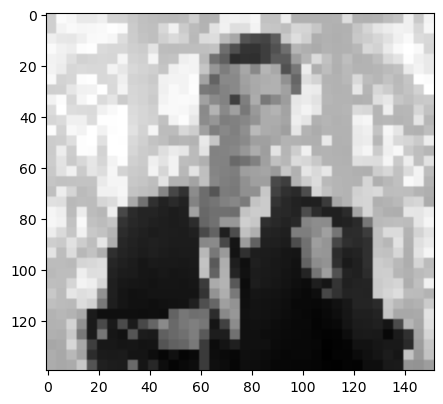

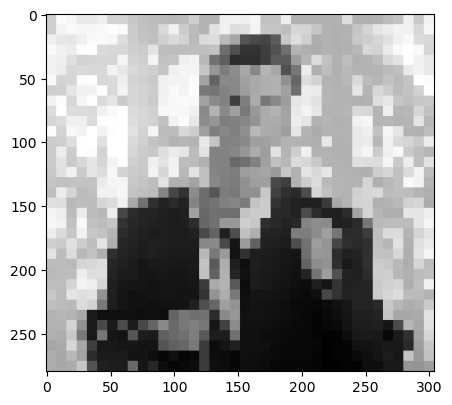

In [49]:
# Let's re-upsample, sub-sampled rick
data_duplicate = duplicate(data_subsample3);

plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

In [51]:
# Now let's try max pooling back up
# The input x_high_res is the original high res image, from which you can deduce the position of the maximum index
def max_unpool(x_in, x_high_res):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  # TODO -- write the subsampling routine
  for i in range(x_in.shape[0]):
        for j in range(x_in.shape[1]):
            # We use x_high_res to deduce the maximum index (this is where the max value was from pooling)
            max_value_position = x_high_res[i, j]
            
            # Place the max value in the corresponding location in the output
            x_out[2 * i, 2 * j] = max_value_position 

  return x_out

In [53]:
print("Original:")
print(orig_2_2)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

Original:
[[6 8]
 [8 4]]
Max unpooled:
[[1. 0. 3. 0.]
 [0. 0. 0. 0.]
 [6. 0. 2. 0.]
 [0. 0. 0. 0.]]


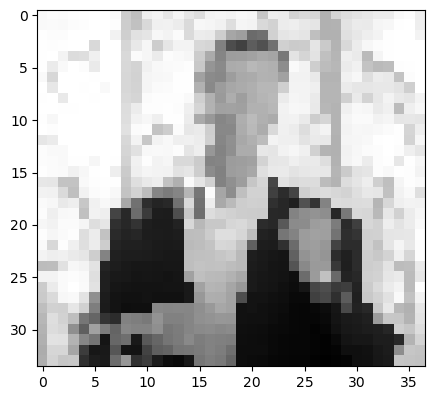

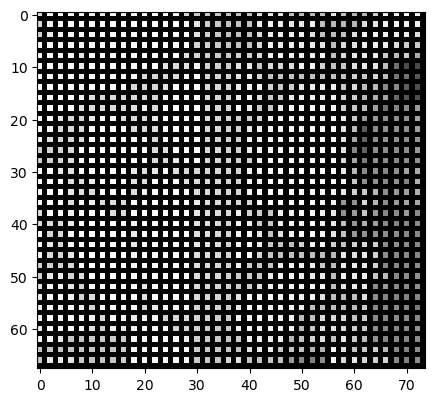

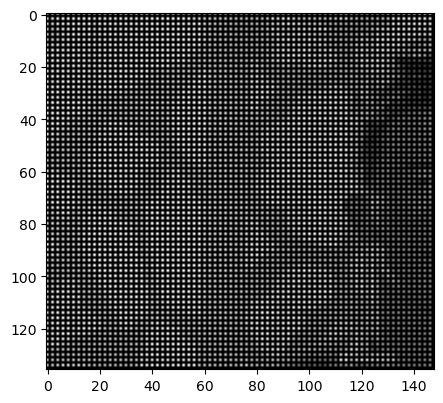

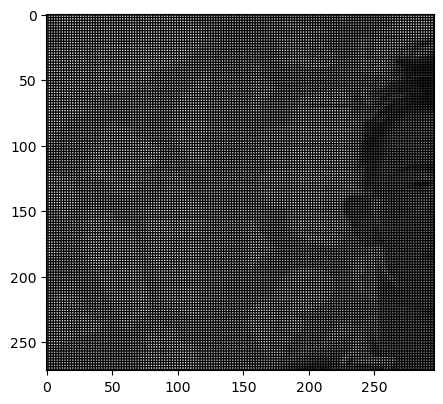

In [55]:
# Let's re-upsample, sub-sampled rick
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2);

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

In [61]:
def bilinear(x_in):
    h, w = x_in.shape
    x_out = np.zeros((h * 2, w * 2))
    
    for i in range(h):
        for j in range(w):
            val = x_in[i, j]
            x_out[2 * i, 2 * j] = val  # Original pixel
            
            if j + 1 < w:
                x_out[2 * i, 2 * j + 1] = (x_in[i, j] + x_in[i, j + 1]) / 2  # Horizontal interp
            else:
                x_out[2 * i, 2 * j + 1] = x_in[i, j]
            
            if i + 1 < h:
                x_out[2 * i + 1, 2 * j] = (x_in[i, j] + x_in[i + 1, j]) / 2  # Vertical interp
            else:
                x_out[2 * i + 1, 2 * j] = x_in[i, j]

            if i + 1 < h and j + 1 < w:
                x_out[2 * i + 1, 2 * j + 1] = (x_in[i, j] + x_in[i + 1, j] + x_in[i, j + 1] + x_in[i + 1, j + 1]) / 4  # Bilinear interp
            else:
                x_out[2 * i + 1, 2 * j + 1] = x_in[i, j]

    return x_out

In [63]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

Original:
[[6 8]
 [8 4]]
Bilinear:
[[6.  7.  8.  8. ]
 [7.  6.5 6.  8. ]
 [8.  6.  4.  4. ]
 [8.  8.  4.  4. ]]


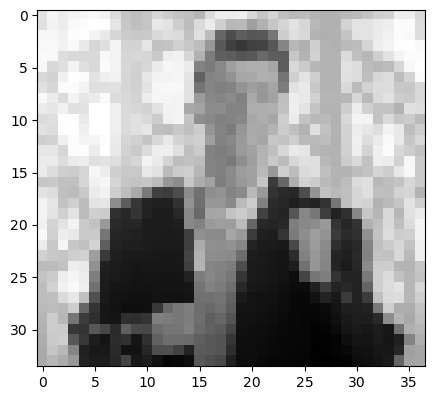

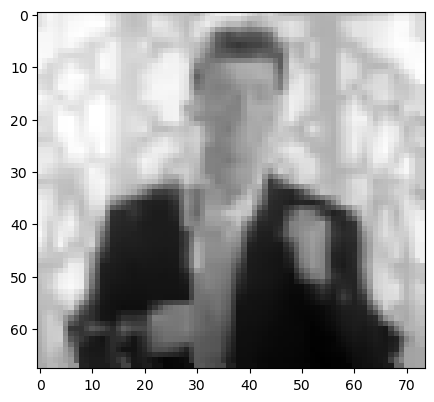

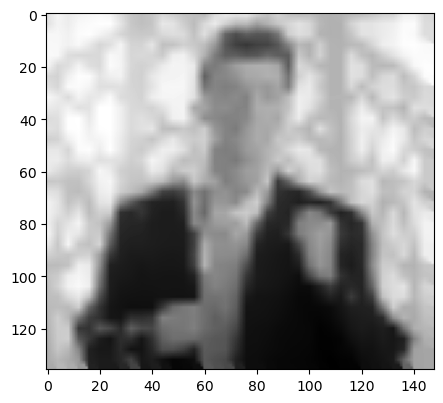

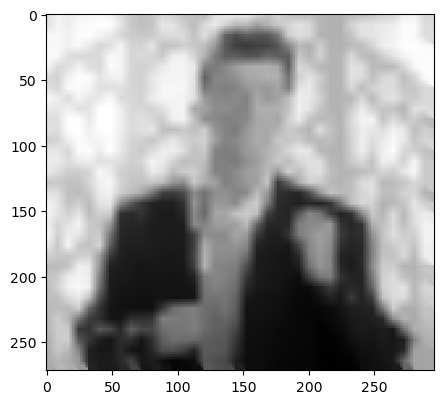

In [65]:
# Let's re-upsample, sub-sampled rick
data_bilinear = bilinear(data_meanpool3);

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()